In [1]:
import LinearAlgebra as linalg
import Plots as plt
import Polynomials as poly
import NonlinearSolve as nonlin

using Format
using .Threads
using ProgressMeter

include("cheb.jl")
include("solvers.jl")
include("CosmoTimeStepExpr.jl")
include("CosmoCoeffExpr.jl")

T = BigFloat  # precision type (change here if needed)
setprecision(T, 512) 

Vfun(x) = ( -576. - 288. * x^2 - 64. * x^4 + 22. * x^6 - x^8) / 192.;
DV(x) = - x * (144. + 64. * x^2 - 33. * x^4 + 2. * x^6) / 48.;

const E = exp(T(1.));

In [ ]:
#Checking that git works. Again

In [47]:
Ndom = 4;
Npts = 15;
N = Ndom * Npts;
NVar = 5;

zmin = T(1e-40);
zmax = T(.6);


DiffMats2, DiffMats, grid = MultiGridChebyshev(zmin, zmax, Ndom,Npts);

In [48]:
InitGuess = zeros(T,NVar,N);
zAH = T(0.5);
X = T(0.);
tinit = T(-3)
p2 = 0;
a4 = T(-50);
M  = T(1);
margin = 10;

In [49]:
X = T(.7);
Var = copy(InitGuess);

for ii in 1:200
    Var[2,1:N] = LinearSolveODE(Var, 1, a4, X, tinit);
    Var[3,1:N] = LinearSolveODE(Var, 2, a4, X, tinit);
    X = CorrectXi(Var, X, tinit, margin);
    print("\rX = $X")
    flush(stdout)
end

X = 0.751371546370520765459151319509873102229729478820316019926047002221753447532078213117075160290995966477682320299034891457504207685105723040689175366967419598

In [51]:
initX = copy(X);

Ndom = 4;
Npts = 15;
N = Ndom * Npts;
NVar = 5;
IterMax = 10;

zmin = T(1e-40);
zmax = T(.5);

DiffMats2, DiffMats, grid = MultiGridChebyshev(zmin, zmax, Ndom,Npts);

InitGuess = zeros(T,NVar,N);

In [52]:
InitVar = ComputeBulk(Var[1,1:N], X, a4, tinit);

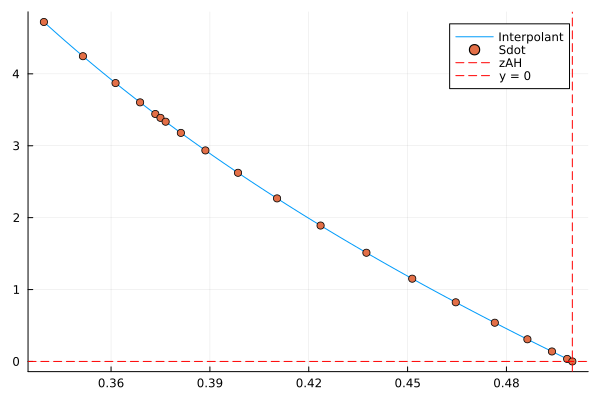

In [53]:
fig = PlotSdot(InitVar, X,tinit, 40);
display(fig)

In [55]:
dt = T(.0005);

OutputArr = [];
MonitorArr = [];

Evolve(InitVar, initX, a4, T(tinit), 2, dt, 10, OutputArr, MonitorArr)

◐ time = -2.945, Sdot at zAH = 0.00020    Time: 0:00:20

LoadError: InterruptException:

In [ ]:
length(Timearr)

In [ ]:
plt.scatter(Timearr[1:301], Energy[1:301])

In [ ]:
plt.scatter(Timearr[1:301], XArr[1:301])

In [ ]:
length(Timearr)

In [ ]:
ind = 1501
fig = PlotSdot(OutputArr[ind], XArr[ind],Timearr[ind], 59);
display(fig)

In [ ]:
# Eps, Mom, Op = Monitor(InitVar, tinit, X);

# Energy = [Eps];
# Momentum = [Mom];
# Operator = [Op];

# for ii in 1:length(Timearr)
#     Eps, Mom, Op = Monitor(OutputArr[ii][:,:],Timearr[ii],XArr[ii]);
#     push!(Energy, Eps);
#     push!(Momentum, Mom);
#     push!(Operator, Op);
# end

In [ ]:
# oldOutput = copy(OutputArr);
# oldXArr = copy(XArr);
# olda4Arr = copy(a4Arr);
# oldtime = copy(Timearr);

# oldEnergy = copy(Energy);
# oldMomentum = copy(Momentum);
# oldOperator = copy(Operator);

In [ ]:
indstart = 301;
OldTimeDer = [];

time = T(oldtime[indstart]);
dt = T(0.00002);
VarOld = copy(oldOutput[indstart][:,:]);
XOld = copy(oldXArr[indstart]);
a4Old = copy(olda4Arr[indstart]);

OutputArr = [copy(VarOld)];
XArr = [copy(XOld)]
a4Arr= [copy(a4Old)]
counter = 0;

Eps, Mom, Op = Monitor(VarOld,time, XOld)

Energy = [Eps];
Momentum = [Mom];
Operator = [Op];
Timearr = [time];

RKmargin = 0;

for ii in 1:3
    push!(OldTimeDer, TimeDer(VarOld, XOld, time, margin));

    VarNew, XNew, a4New = RK4(VarOld, XOld, a4Old, time, dt, RKmargin);
    VarOld = copy(VarNew);
    XOld = copy(XNew);
    a4Old = copy(a4New);

    time = time+dt;
    counter += 1; 

end

while(time<2)

    VarNew, XNew, a4New = AB4(VarOld, XOld, a4Old, time, dt, OldTimeDer);
    VarOld = copy(VarNew);
    XOld = copy(XNew);
    a4Old = copy(a4New);

    time = time+dt;
    counter += 1; 
    print(string("\rtime = ",format(time, precision = 4),", ξ = ",format(XOld, precision=4)));
    flush(stdout);
    
    if(counter == 50)
        Eps, Mom, Op = Monitor(VarOld, time, XOld)

        push!(Energy, Eps);
        push!(Momentum, Mom);
        push!(Operator, Op);

        push!(OutputArr, VarOld);
        push!(XArr, XOld);
        push!(a4Arr, a4Old);
        push!(Timearr, time);
        counter = 0;
    end
end

In [ ]:
plt.scatter(Timearr,XArr)